## Line plots of all mooring data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr
import gsw

### Open datasets with raw observations

In [2]:
# open Sverdrup 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
sverdrup_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_L3_2018-2019.nc")
sverdrup_ds.close()

In [3]:
# open Rink 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
rink_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_RinkFisher_1D_L3_2018-2019.nc")
rink_ds.close()

In [4]:
# open Fisher Islands 2020 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
fisher_ds = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_RinkFisher_1D_L3_2019-2020.nc')
fisher_ds.close()

In [5]:
# open Kong Oscar 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
kongoscar19_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_L3_2018-2019.nc")
kongoscar19_ds.close()

In [6]:
# open Kong Oscar 2020 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
kongoscar20_ds = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2019-2020.nc')
kongoscar20_ds.close()

In [39]:
# function to convert Absolute Salinity from Practical Salinity and Conservative Temperature from in-situ temperature
def convert_to_teos10(ds):
    # absolute salinity
    SA = gsw.conversions.SA_from_SP(ds.salinity,ds.pressure,ds.longitude,ds.latitude)
    # conservative temp
    CT = gsw.conversions.CT_from_t(SA,ds.temperature,ds.pressure)

    SA = SA.isel(station=0)
    CT = CT.isel(station=0)
    
    return SA, CT

In [40]:
# for all moorings: convert Absolute Salinity from Practical Salinity and Conservative Temperature from in-situ temperature
sverdrup_SA, sverdrup_CT = convert_to_teos10(sverdrup_ds)
rink_SA, rink_CT = convert_to_teos10(rink_ds)
fisher_SA, fisher_CT = convert_to_teos10(fisher_ds)
kongoscar19_SA, kongoscar19_CT = convert_to_teos10(kongoscar19_ds)
kongoscar20_SA, kongoscar20_CT = convert_to_teos10(kongoscar20_ds)

### Open DataArrays with interpolated temperature and salinity profiles

In [23]:
file_dir = Path('/Users/mariezahn/Documents/Work/PhD/Chapter_3/data/OMG_narwhals_mooring_interpolated/')

In [24]:
# open Rink data
rink_temp_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Rink-Fisher_1D_interpolated_temp_profile.nc")
rink_temp_da_interp.close()
rink_salt_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Rink-Fisher_1D_interpolated_salt_profile.nc")
rink_salt_da_interp.close()

In [26]:
# open Kong Oscar data
kongoscar_temp_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_temp_profile.nc")
kongoscar_temp_da_interp.close()
kongoscar_salt_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_salt_profile.nc")
kongoscar_salt_da_interp.close()

In [27]:
# open Sverdrup data
sverdrup_temp_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_temp_profile.nc")
sverdrup_temp_da_interp.close()
sverdrup_salt_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_salt_profile.nc")
sverdrup_salt_da_interp.close()

***

In [83]:
rink_temp_da_interp.depth

<xarray.DataArray 'depth' (depth: 100)> Size: 800B
array([ 76.      ,  81.878788,  87.757576,  93.636364,  99.515152, 105.393939,
       111.272727, 117.151515, 123.030303, 128.909091, 134.787879, 140.666667,
       146.545455, 152.424242, 158.30303 , 164.181818, 170.060606, 175.939394,
       181.818182, 187.69697 , 193.575758, 199.454545, 205.333333, 211.212121,
       217.090909, 222.969697, 228.848485, 234.727273, 240.606061, 246.484848,
       252.363636, 258.242424, 264.121212, 270.      , 275.878788, 281.757576,
       287.636364, 293.515152, 299.393939, 305.272727, 311.151515, 317.030303,
       322.909091, 328.787879, 334.666667, 340.545455, 346.424242, 352.30303 ,
       358.181818, 364.060606, 369.939394, 375.818182, 381.69697 , 387.575758,
       393.454545, 399.333333, 405.212121, 411.090909, 416.969697, 422.848485,
       428.727273, 434.606061, 440.484848, 446.363636, 452.242424, 458.121212,
       464.      , 469.878788, 475.757576, 481.636364, 487.515152, 493.393939,
       499.272727, 505.151515, 511.030303, 516.909091, 522.787879, 528.666667,
       534.545455, 540.424242, 546.30303 , 552.181818, 558.060606, 563.939394,
       569.818182, 575.69697 , 581.575758, 587.454545, 593.333333, 599.212121,
       605.090909, 610.969697, 616.848485, 622.727273, 628.606061, 634.484848,
       640.363636, 646.242424, 652.121212, 658.      ])
Coordinates:
  * depth    (depth) float64 800B 76.0 81.88 87.76 93.64 ... 646.2 652.1 658.0

In [85]:
# 120-140 m

# temperature
rink_temp_120m_timeseries_da     = rink_temp_da_interp.conservative_temperature.isel(station=0).sel(depth=slice(120,141)).mean(dim='depth', skipna=True)
sverdrup_temp_120m_timeseries_da = sverdrup_temp_da_interp.conservative_temperature.isel(station=0).sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
KO_temp_120m_timeseries_da       = kongoscar_temp_da_interp.conservative_temperature.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)

# salinity
rink_salt_120m_timeseries_da     = rink_salt_da_interp.absolute_salinity.isel(station=0).sel(depth=slice(120,141)).mean(dim='depth', skipna=True)
sverdrup_salt_120m_timeseries_da = sverdrup_salt_da_interp.absolute_salinity.isel(station=0).sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
KO_salt_120m_timeseries_da       = kongoscar_salt_da_interp.absolute_salinity.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)

In [63]:
# 220-240 m

# temperature
rink_temp_220m_timeseries_da     = rink_temp_da_interp.conservative_temperature.isel(station=0).sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sverdrup_temp_220m_timeseries_da = sverdrup_temp_da_interp.conservative_temperature.isel(station=0).sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
KO_temp_220m_timeseries_da       = kongoscar_temp_da_interp.conservative_temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

# salinity
rink_salt_220m_timeseries_da     = rink_salt_da_interp.absolute_salinity.isel(station=0).sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sverdrup_salt_220m_timeseries_da = sverdrup_salt_da_interp.absolute_salinity.isel(station=0).sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
KO_salt_220m_timeseries_da       = kongoscar_salt_da_interp.absolute_salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

### Raw observations of temp and salinity from CTDs

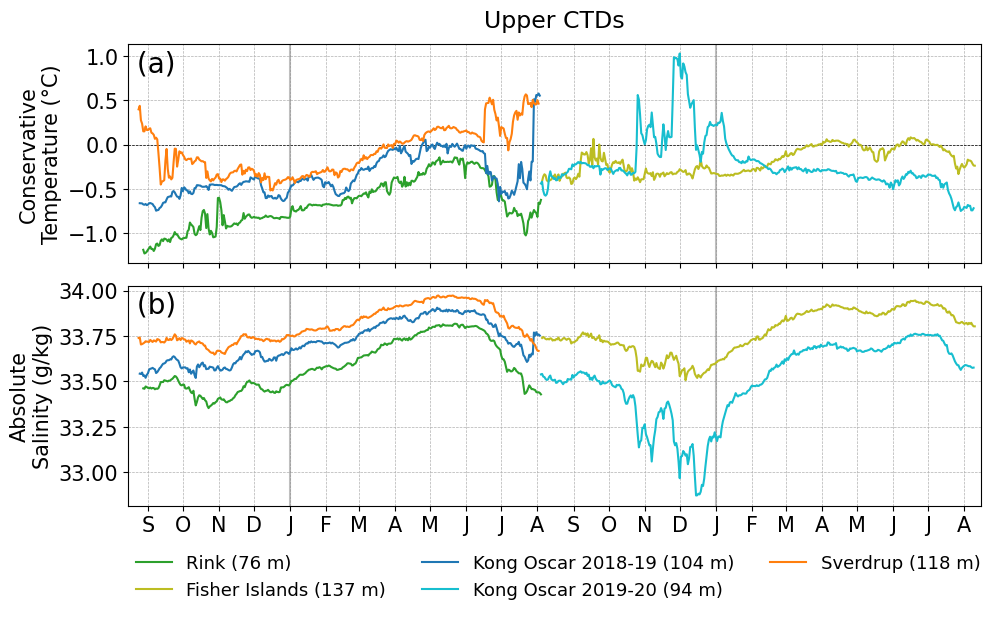

In [55]:
plt.rcParams['font.size'] = '15'
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[11,6])
plt.subplots_adjust(wspace=0, hspace=0.1)

ax1.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C

ax1.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax1.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')

# plot temperature
depth_rink=rink_ds.salinity.depth_CTD.values[0]
depth_fisher=fisher_ds.salinity.depth_CTD.values[0]
depth_KO19=kongoscar19_ds.salinity.depth_CTD.values[0]
depth_KO20=kongoscar20_ds.salinity.depth_CTD.values[0]
depth_sver=sverdrup_ds.salinity.depth_CTD.values[0]

rink_CT.sel(depth_temperature=depth_rink,depth_CTD=depth_rink).plot(ax=ax1, c='tab:green', label='Rink')
fisher_CT.sel(depth_temperature=depth_fisher,depth_CTD=depth_fisher).plot(ax=ax1, c='tab:olive', label='Fisher Islands')
kongoscar19_CT.sel(depth_temperature=depth_KO19,depth_CTD=depth_KO19).plot(ax=ax1, c='tab:blue', label='Kong Oscar')
kongoscar20_CT.sel(depth_temperature=depth_KO20,depth_CTD=depth_KO20).plot(ax=ax1, c='tab:cyan')
sverdrup_CT.sel(depth_temperature=depth_sver,depth_CTD=depth_sver).plot(ax=ax1, c='tab:orange', label='Sverdrup')

# plot salinity
rink_SA.sel(depth_CTD=rink_ds.salinity.depth_CTD.values[0]).plot(ax=ax2, c='tab:green', label='Rink'+' ('+ str(rink_ds.salinity.depth_CTD.values[0]) +' m)')
fisher_SA.sel(depth_CTD=fisher_ds.salinity.depth_CTD.values[0]).plot(ax=ax2, c='tab:olive', label='Fisher Islands'+' ('+ str(fisher_ds.salinity.depth_CTD.values[0]) +' m)')
kongoscar19_SA.sel(depth_CTD=kongoscar19_ds.salinity.depth_CTD.values[0]).plot(ax=ax2, c='tab:blue', label='Kong Oscar 2018-19'+' ('+ str(kongoscar19_ds.salinity.depth_CTD.values[0]) +' m)')
kongoscar20_SA.sel(depth_CTD=kongoscar20_ds.salinity.depth_CTD.values[0]).plot(ax=ax2, c='tab:cyan', label='Kong Oscar 2019-20'+' ('+ str(kongoscar20_ds.salinity.depth_CTD.values[0]) +' m)')
sverdrup_SA.sel(depth_CTD=sverdrup_ds.salinity.depth_CTD.values[0]).plot(ax=ax2, c='tab:orange', label='Sverdrup'+' ('+ str(sverdrup_ds.salinity.depth_CTD.values[0]) +' m)')

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()
abbreviations = ["S","O",'N','D',"J",'F','M','A','M','J','J','A','S','O','N','D',"J",'F','M','A','M','J','J','A','S','O']

ax1.set_title('Upper CTDs',loc='center',y=1.2, pad=5,fontsize = 17)
ax1.set_title(" (a)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Conservative\nTemperature (°C)")
ax1.set_xlabel("")
ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax2.set_title("")
ax2.set_title(" (b)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax2.set_ylabel("Absolute\nSalinity (g/kg)")
# ax2.set_xlabel("Month")
ax2.set_xlabel("")
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'));

# ax2.legend(ncol=3,prop={'size': 13},loc='upper left');
ax2.legend(ncol=3,prop={'size': 13},bbox_to_anchor=(-0.01, -0.15), loc='upper left',frameon=False);

plt.savefig("figures/mooring_upperCTDs-temp-salt.png", bbox_inches='tight', dpi=300, facecolor='white');

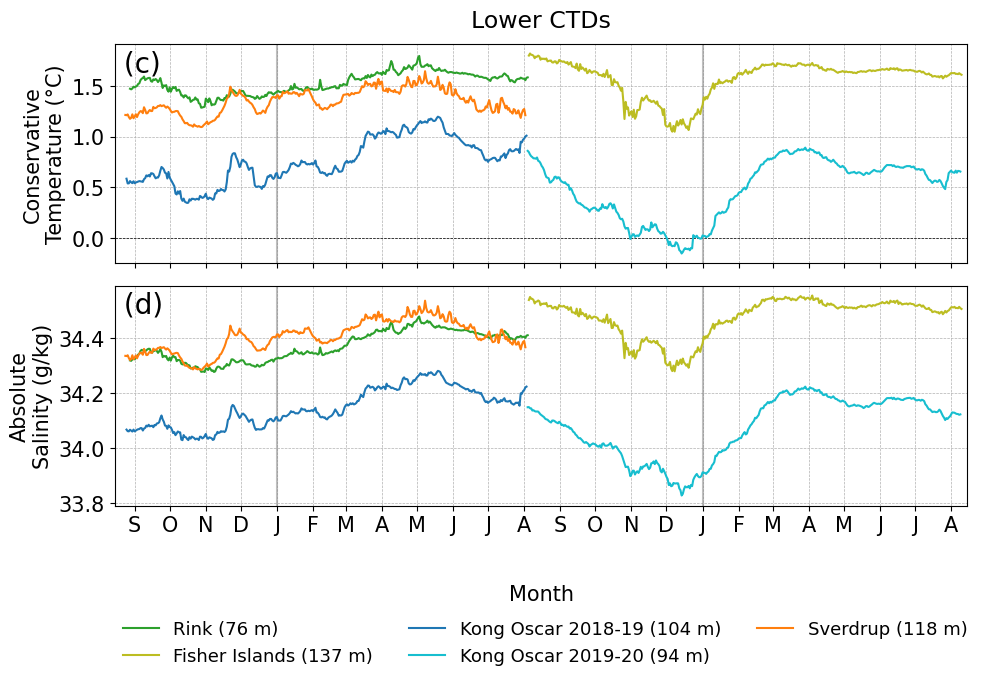

In [56]:
plt.rcParams['font.size'] = '15'
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[11,6])
plt.subplots_adjust(wspace=0, hspace=0.1)

ax1.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C
ax1.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax1.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')

# plot temperature
depth_rink=rink_ds.salinity.depth_CTD.values[1]
depth_fisher=fisher_ds.salinity.depth_CTD.values[1]
depth_KO19=kongoscar19_ds.salinity.depth_CTD.values[1]
depth_KO20=kongoscar20_ds.salinity.depth_CTD.values[1]
depth_sver=sverdrup_ds.salinity.depth_CTD.values[1]

rink_CT.sel(depth_temperature=depth_rink,depth_CTD=depth_rink).plot(ax=ax1, c='tab:green', label='Rink')
fisher_CT.sel(depth_temperature=depth_fisher,depth_CTD=depth_fisher).plot(ax=ax1, c='tab:olive', label='Fisher Islands')
kongoscar19_CT.sel(depth_temperature=depth_KO19,depth_CTD=depth_KO19).plot(ax=ax1, c='tab:blue', label='Kong Oscar')
kongoscar20_CT.sel(depth_temperature=depth_KO20,depth_CTD=depth_KO20).plot(ax=ax1, c='tab:cyan')
sverdrup_CT.sel(depth_temperature=depth_sver,depth_CTD=depth_sver).plot(ax=ax1, c='tab:orange', label='Sverdrup')

# plot salinity
rink_SA.sel(depth_CTD=rink_ds.salinity.depth_CTD.values[1]).plot(ax=ax2, c='tab:green', label='Rink'+' ('+ str(rink_ds.salinity.depth_CTD.values[0]) +' m)')
fisher_SA.sel(depth_CTD=fisher_ds.salinity.depth_CTD.values[1]).plot(ax=ax2, c='tab:olive', label='Fisher Islands'+' ('+ str(fisher_ds.salinity.depth_CTD.values[0]) +' m)')
kongoscar19_SA.sel(depth_CTD=kongoscar19_ds.salinity.depth_CTD.values[1]).plot(ax=ax2, c='tab:blue', label='Kong Oscar 2018-19'+' ('+ str(kongoscar19_ds.salinity.depth_CTD.values[0]) +' m)')
kongoscar20_SA.sel(depth_CTD=kongoscar20_ds.salinity.depth_CTD.values[1]).plot(ax=ax2, c='tab:cyan', label='Kong Oscar 2019-20'+' ('+ str(kongoscar20_ds.salinity.depth_CTD.values[0]) +' m)')
sverdrup_SA.sel(depth_CTD=sverdrup_ds.salinity.depth_CTD.values[1]).plot(ax=ax2, c='tab:orange', label='Sverdrup'+' ('+ str(sverdrup_ds.salinity.depth_CTD.values[0]) +' m)')

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()
abbreviations = ["S","O",'N','D',"J",'F','M','A','M','J','J','A','S','O','N','D',"J",'F','M','A','M','J','J','A','S','O']

ax1.set_title('Lower CTDs',loc='center',y=1.2, pad=5,fontsize = 17)
ax1.set_title(" (c)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Conservative\nTemperature (°C)")
ax1.set_xlabel("")
ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax2.set_title("")
ax2.set_title(" (d)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax2.set_ylabel("Absolute\nSalinity (g/kg)")
ax2.set_xlabel("Month", labelpad=35)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))
ax2.legend(ncol=3,prop={'size': 13},bbox_to_anchor=(-0.01, -0.45), loc='upper left',frameon=False);

plt.savefig("figures/mooring_lowerCTDs-temp-salt.png", bbox_inches='tight', dpi=300, facecolor='white');

### Anomaly plots

In [86]:
mooring_temp_120m = np.concatenate((rink_temp_120m_timeseries_da.values,
                                    sverdrup_temp_120m_timeseries_da.values,
                                    KO_temp_120m_timeseries_da.values))
mooring_temp_120m_mean = np.nanmean(mooring_temp_120m)

In [87]:
mooring_temp_120m_mean

np.float64(-0.05754027062144247)

In [88]:
mooring_salt_120m = np.concatenate((rink_salt_120m_timeseries_da.values, 
                                    sverdrup_salt_120m_timeseries_da.values,
                                    KO_salt_120m_timeseries_da.values))
mooring_salt_120m_mean = np.nanmean(mooring_salt_120m)

In [89]:
mooring_salt_120m_mean

np.float64(33.76579751136585)

In [90]:
mooring_temp_220m = np.concatenate((rink_temp_220m_timeseries_da.values,
                                    sverdrup_temp_220m_timeseries_da.values,
                                    KO_temp_220m_timeseries_da.values))
mooring_temp_220m_mean = np.nanmean(mooring_temp_220m)

In [91]:
mooring_temp_220m_mean

np.float64(0.6305863420438853)

In [92]:
mooring_salt_220m = np.concatenate((rink_salt_220m_timeseries_da.values,
                                    sverdrup_salt_220m_timeseries_da.values,
                                    KO_salt_220m_timeseries_da.values))
mooring_salt_220m_mean = np.nanmean(mooring_salt_220m)

In [93]:
mooring_salt_220m_mean

np.float64(34.072695006948116)

### Mean temp and salinity line plot

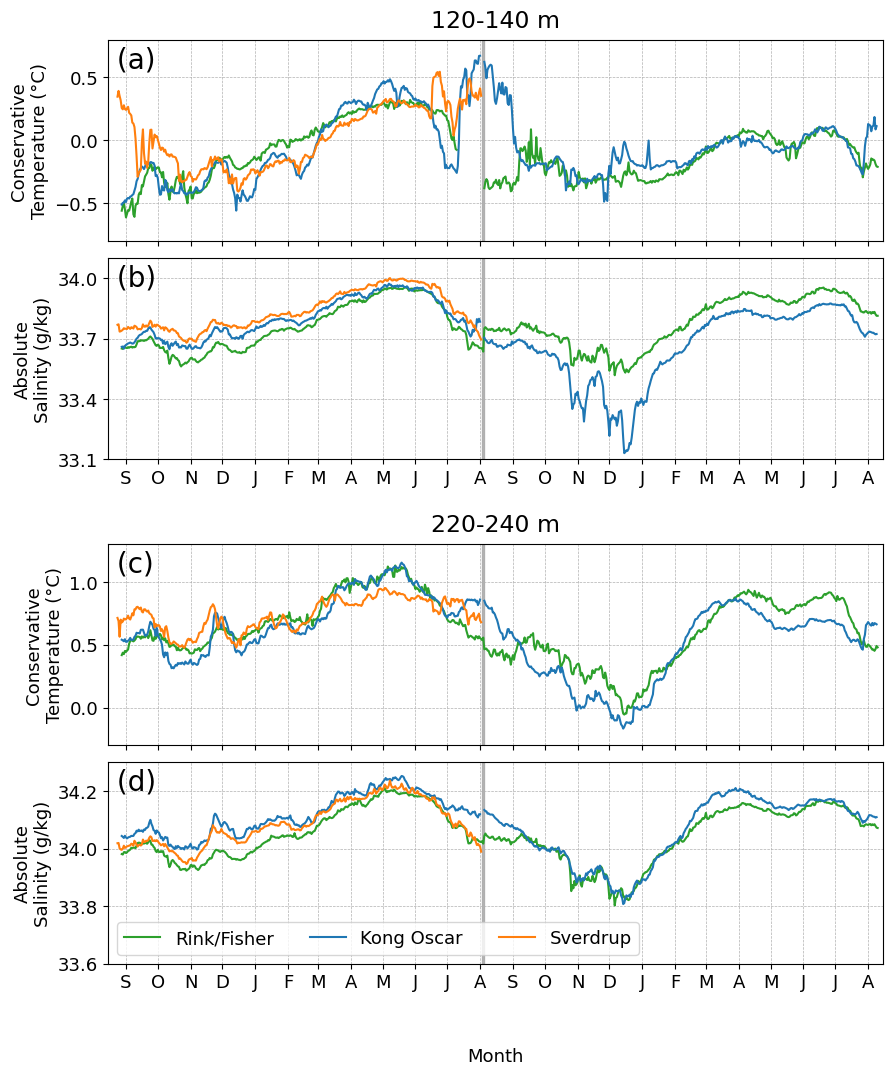

In [99]:
plt.rcParams['font.size'] = '13'
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=[10,12], gridspec_kw={'height_ratios': [1,1,0.25,1,1]})

#### 120-140 m =======================================

# plot temperature
# (fisher_temp_120m_timeseries_da - mooring_temp_120m_mean).plot(ax=ax1, c='tab:green', label='Rink/Fisher')
rink_temp_120m_timeseries_da.plot(ax=ax1, c='tab:green')
KO_temp_120m_timeseries_da.plot(ax=ax1, c='tab:blue', label='Kong Oscar')
sverdrup_temp_120m_timeseries_da.plot(ax=ax1, c='tab:orange', label='Sverdrup')

# plot salinity
# (fisher_salt_120m_timeseries_da - mooring_salt_120m_mean).plot(ax=ax2, c='tab:green', label='Rink/Fisher')
rink_salt_120m_timeseries_da.plot(ax=ax2, c='tab:green')
KO_salt_120m_timeseries_da.plot(ax=ax2, c='tab:blue', label='Kong Oscar')
sverdrup_salt_120m_timeseries_da.plot(ax=ax2, c='tab:orange', label='Sverdrup')

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()
# abbreviations = ["S'18","O",'N','D',"J'19",'F','M','A','M','J','J','A','S','O','N','D',"J'20",'F','M','A','M','J','J','A','S','O']
abbreviations = ["S","O",'N','D',"J",'F','M','A','M','J','J','A','S','O','N','D',"J",'F','M','A','M','J','J','A','S','O']

ax1.set_title('120-140 m',loc='center',y=1.2,fontsize = 17)
ax1.set_title(" (a)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Conservative\nTemperature (°C)")
ax1.set_xlabel("")
ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax2.set_title("")
ax2.set_title(" (b)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax2.set_ylabel("Absolute\nSalinity (g/kg)")
# ax2.set_xlabel("Month")
ax2.set_xlabel("")
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))
# ax2.legend(ncol=2,prop={'size': 13})

ax3.axis('off') # filler axis

#### 220-240 m =======================================
# plot temperature
# (fisher_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax4, c='tab:green')
rink_temp_220m_timeseries_da.plot(ax=ax4, c='tab:green', label='Rink/Fisher')
KO_temp_220m_timeseries_da.plot(ax=ax4, c='tab:blue', label='Kong Oscar')
sverdrup_temp_220m_timeseries_da.plot(ax=ax4, c='tab:orange', label='Sverdrup')

# plot salinity
# (fisher_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax5, c='tab:green')
rink_salt_220m_timeseries_da.plot(ax=ax5, c='tab:green', label='Rink/Fisher')
KO_salt_220m_timeseries_da.plot(ax=ax5, c='tab:blue', label='Kong Oscar')
sverdrup_salt_220m_timeseries_da.plot(ax=ax5, c='tab:orange', label='Sverdrup')

ax4.set_title('220-240 m',loc='center',y=1.2,fontsize = 17)
ax4.set_title(" (c)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax4.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax4.set_ylabel("Conservative\nTemperature (°C)")
ax4.set_xlabel("")
ax4.xaxis.set_ticklabels([])
ax4.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax4.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax5.set_title("")
ax5.set_title(" (d)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax5.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax5.set_ylabel("Absolute\nSalinity (g/kg)")
ax5.set_xlabel("Month", labelpad=40)
ax5.grid(linestyle='--', linewidth=0.5)
ax5.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))
ax5.legend(ncol=3,prop={'size': 13},loc='lower left')

plt.subplots_adjust(wspace=0, hspace=0.1)

ax2.set_yticks([33.1,33.4,33.7,34])
# ax4.set_yticks([-0.8,-0.4,0,0.4,0.8])

ax1.set_ylim(-0.8,0.8)
ax2.set_ylim(33.1,34.1)
ax4.set_ylim(-0.3,1.3)
ax5.set_ylim(33.6,34.3)

## add vertical lines for when the moorings were recovered and redployed
ax1.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')
ax2.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')
ax4.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')
ax5.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')

plt.savefig("figures/mooring_mean-temp-salt.png", bbox_inches='tight', dpi=300, facecolor='white');